<a href="https://colab.research.google.com/github/bcaffo/ds4bme_intro/blob/master/notebooks/notebook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression
## Classification with one continuous variable

Suppose now that we want to predict the gold standard from the FLAIR values. Fitting a line seems weird, since the outcome can only be 0 or 1. A line would allow for arbitrarily small or large predictions. Similiarly, forcing the prediction to be exactly 0 or 1 leads to difficult optimization problems. A clever solution is to instead model

$$
P(Y_i = 1 ~|~ X_i)
$$

where $Y_i$ is the gold standard value (0 or 1 for no lesion or lesion at that voxel, respectively) and $X_i$ is the FLAIR value for voxel $i$. This solves the problem somewhat nicely, but it still leaves some issues unresolved. For example, what does probability even mean in this context? And also probabilities are between 0 and 1, that's better than exactly 0 or 1, but still would create problems.

For the probability, it's generally a good idea to think about what you're modeling as random in the context. In this case, we're thinking of our voxels as a random sample of FLAIR and gold standard voxel values from some population. This is a meaningful benchmark even if it's not true. We'll find that often in statistics we model data as if it comes from a probability distribution when we know it didn't. We simply know that the probability distribution is a useful model for thinking about the problem.

As for getting the probabilities from $[0,1]$ to $(-\infty, \infty)$, we need a function, preferably a monotonic one. The generally agreed upon choice is the logit (natural log of the odds) function. The logit function of a probability is defined as

$$
\eta = \mathrm{logit}(p) = \log\{p / (1 - p)\}
$$

where $p$ is the probability and $O = p/(1-p)$ is called the **odds**. Note, you can go backwards from odds to probability with the function $p = O / (1 + O)$. Odds are exactly as used in gambling. If the odds of bet at 1 to 99, then you are saying the probability is $1 / (99 + 1) = 1\%$. 

Why use odds? There's a couple of reasons why odds are uniquely interprettable. First, there are specific study designs where odds make more sense than probabilities, particularly retrospective ones. Secondly, odds are unique in binomial models where they work out to be particularly tractible to work with. Finally, odds have a unique gambling interpretation. That is, it gives the ratio of a  one dollar risk to the return in a fair bet. (A fair bet is where the expected return is 0.) So, when a horse track gives the odds on a horse to be 99 to 1, they are saying that you would get $99 dollars if you bet one dollar and the horse won. This is an implied probability of 99 / (99 + 1) = 99% that the horse loses and 1% probability that the horse wins. Note they don't usually express it as a fraction, they usually espress it as value to 1 or 1 to value. So they would say 99 to 1 (odds against) or 1 to 99 (odds for) so you can easily see how much you'd win for a dollar bet. 

You can go backwards from the logit function to the probability with the expit function. That is, if $\eta$ is defined as above, then

$$
p = \frac{e^{\eta}}{1 + e^\eta} = \frac{1}{1 + e^{-\eta}}.
$$

This is sometimes called the **expit** function or **sigmoid**.


We model the log of the odds as linear. This is called **logistic regression**.

$$
\eta = \mathrm{logit}\left\{ P(Y = 1 ~|~ X) \right\}
= \beta_0 + \beta_1 X.
$$

The nice part about this model is that $e^\beta_1$ has the nice interpretation of the odds ratio associated with a one unit change in $X$.

This is great, but we still need a function of the probabilities to optimize. We'll use the **cross entropy**. 

$$
-\sum_{i=1}^n \left[Y_i \log\{P(Y_i = 1 ~|~ X_i)\} + (1 - Y_i) \log\{1 - P(Y_i = 1 ~|~ X_i)\}\right].
$$

This function has the interpretation of being the negative of the log of the probabilities assuming the $Y_i$ are independent. This model doesn't have to hold for the minimization to be useful. 

Plugging our logit model in, the cross entropy now looks like

$$
-\sum_{i=1}^n \left[
  Y_i \eta_i + \log\left\{\frac{1}{1 + e^\eta_i} \right\} \right].
$$

This is the function that we minimize to perform logistic regression. Later on, we'll worry about how to minimize this function. However, today, let's fit logistic regression to some data.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
## this sets some style parameters
sns.set()

## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")

/home/codespace/.conda/envs/ds4bio/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAIR', ylabel='GOLD_Lesions'>

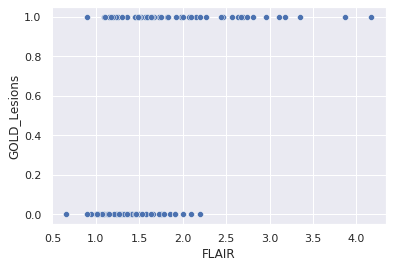

In [2]:
## Plot the data
sns.scatterplot('FLAIR', 'GOLD_Lesions', data = dat)


Let's now fit the model. Again we're going to split into training and test data. But, now we're not going to do it manually since we have to load a library that has a function to do this.

In [3]:
x = dat[['FLAIR']]
y = dat.GOLD_Lesions
trainFraction = .75

## Once again hold out some data
sample = np.random.uniform(size = 100) < trainFraction
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]


In [4]:
lr = lm.LogisticRegression(fit_intercept=True, penalty='none')
fit = lr.fit(xtrain, ytrain)

Let's look at the parameters fit from the model

In [5]:
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

[-4.099781486362034, 2.4154874393105654]

/home/codespace/.conda/envs/ds4bio/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/codespace/.conda/envs/ds4bio/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FLAIR', ylabel='GOLD_Lesions'>

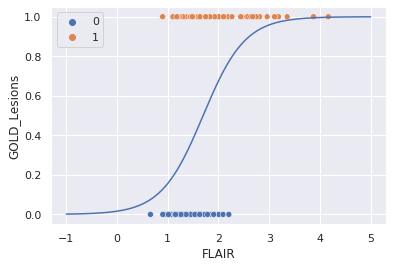

In [6]:
n = 1000
xplot = np.linspace(-1, 5, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

sns.scatterplot('FLAIR', 'GOLD_Lesions', data = dat, hue = 'GOLD_Lesions')
sns.lineplot(xplot, p)

## Of course, scikit has a predict
## function so that you don't have to do this manually
#yplot = fit.predict_proba(xplot.reshape((n, 1)))
#sns.lineplot(xplot, yplot[:, 1])


Now let's evaluate the test set.

In [7]:
## This predicts the classes using a 50% probability cutoff
yhat_test = fit.predict(xtest)

## double checking that if you want
#all(yhat_test == (fit.predict_proba(xtest)[:, 1] > .5))

accuracy = np.mean(yhat_test == ytest)
sensitivity = np.mean(yhat_test[ytest == 1] == ytest[ytest == 1])
specificity = np.mean(yhat_test[ytest == 0] == ytest[ytest == 0])
np.round([accuracy, sensitivity, specificity], 3)


array([0.516, 0.389, 0.692])

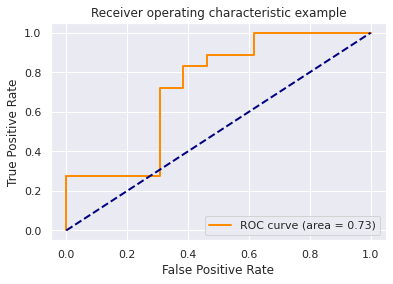

In [8]:
from sklearn.metrics import accuracy_score, roc_curve, auc

ptest = fit.predict_proba(xtest)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, ptest)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
